In [1]:
import pandas as pd
from lhotse import (SupervisionSegment, MonoCut, Fbank, LilcomFilesWriter, 
RecordingSet, Recording, CutSet, MonoCut, FbankConfig)
import sys
from compute_features import create_manifest
import os
import pickle

LOADING INDICES FROM DISK
To recompute set `force_index_recompute=True` in config.py



In [2]:
# Load the sample dataframe with laughter and non-laughter segments 
# These are all laughter from chan0 in meeting 'Bmr021' (label 1)
# There is one corresponding non-laughter segment for each laughter segment - 
# this might be from a different channel though as explained in the thesis.
df = pd.read_csv('data/icsi/data_dfs/samples/sample_df.csv')
df

,start,duration,sub_start,sub_duration,audio_path,meeting_id,chan_id,label
0,1478.75,1.90,1478.92,1.00,Bmr021/chan3.sph,Bmr021,chan3,0
1,488.67,1.25,488.84,1.00,Bmr021/chan5.sph,Bmr021,chan5,0
2,1366.31,1.31,1366.43,1.00,Bmr021/chan3.sph,Bmr021,chan3,0
3,2203.13,1.92,2203.13,1.00,Bmr021/chan5.sph,Bmr021,chan5,0
4,2162.67,1.62,2163.19,1.00,Bmr021/chan2.sph,Bmr021,chan2,0
5,636.62,1.00,636.62,1.00,Bmr021/chan4.sph,Bmr021,chan4,0
6,1.17,1.00,1.17,1.00,Bmr021/chan3.sph,Bmr021,chan3,0
7,1933.38,1.68,1933.67,1.00,Bmr021/chan4.sph,Bmr021,chan4,0
8,22.83,4.37,25.11,1.00,Bmr021/chan0.sph,Bmr021,chan0,0
9,291.15,1.00,291.15,1.00,Bmr021/chan3.sph,Bmr021,chan3,0


In [3]:
# We create a single feature representation manually
# The proper code does this in a loop and actually doesn't load the raw audio file
# It uses precomputed features that represent the whole audio track of one participant and 
# then takes a subset of that feature representation that contains the segment we are interested in

In [4]:
# Select first laughter segment
laugh_seg = df[df.label==1].iloc[0]
laugh_seg

start                     290.69
duration                     1.9
sub_start                 291.39
sub_duration                 1.0
audio_path      Bmr021/chan0.sph
meeting_id                Bmr021
chan_id                    chan0
label                          1
Name: 10, dtype: object

In [5]:
# Matching non-laughter segment
non_laugh_seg = df[df.label==0].iloc[0]
non_laugh_seg

start                    1478.75
duration                     1.9
sub_start                1478.92
sub_duration                 1.0
audio_path      Bmr021/chan3.sph
meeting_id                Bmr021
chan_id                    chan3
label                          0
Name: 0, dtype: object

In [6]:
# First load the recording for the correct meeting and channel
audio_file = 'data/samples/Bmr021_c0.sph'
rec = Recording.from_file(audio_file)

# Define feature extractor using 40 filters and 100samples for 1 second
# Frame shift means that we move forward (1/num_samples)seconds before we create the next feature.
num_samples=100
extractor = Fbank(FbankConfig(num_filters=40, frame_shift=1/num_samples))

In [7]:
# Create a lhotse cut for the laugh segment
laugh_cut = MonoCut(id='sample-laugh', start=laugh_seg.sub_start, duration=laugh_seg.sub_duration, channel=0, recording=rec)
laugh_cut

MonoCut(id='sample-laugh', start=291.39, duration=1.0, channel=0, supervisions=[], features=None, recording=Recording(id='Bmr021_c0', sources=[AudioSource(type='file', channels=[0], source='data/samples/Bmr021_c0.sph')], sampling_rate=16000, num_samples=35391062, duration=2211.941375, transforms=None), custom=None)

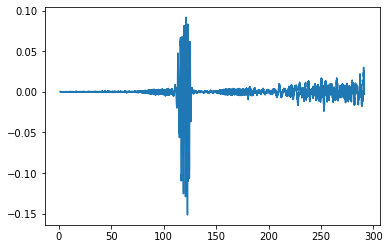

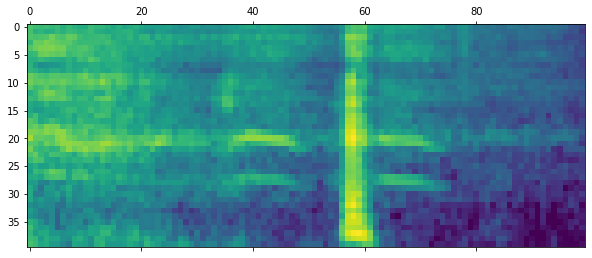

In [8]:
laugh_cut = laugh_cut.compute_and_store_features(extractor, storage=LilcomFilesWriter('.demo-feats'))
laugh_cut.plot_audio()
laugh_cut.plot_features()
laugh_cut.play_audio() # note that audio is automatically normalised

In [9]:
# Create a lhotse cut for the non-laugh segment
non_laugh_cut = MonoCut(id='sample-laugh', start=non_laugh_seg.sub_start, duration=non_laugh_seg.sub_duration, channel=0, recording=rec)
non_laugh_cut

MonoCut(id='sample-laugh', start=1478.92, duration=1.0, channel=0, supervisions=[], features=None, recording=Recording(id='Bmr021_c0', sources=[AudioSource(type='file', channels=[0], source='data/samples/Bmr021_c0.sph')], sampling_rate=16000, num_samples=35391062, duration=2211.941375, transforms=None), custom=None)

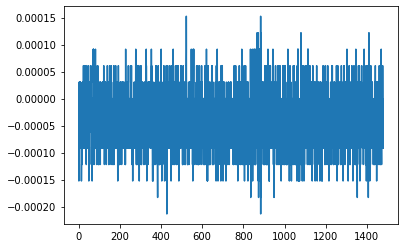

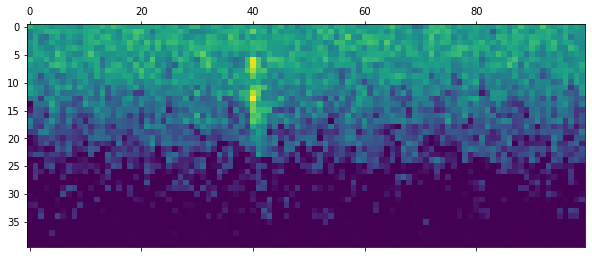

In [10]:
non_laugh_cut = non_laugh_cut.compute_and_store_features(extractor, storage=LilcomFilesWriter('.demo-feats'))
non_laugh_cut.plot_audio()
non_laugh_cut.plot_features()
non_laugh_cut.play_audio() # note that audio is automatically normalised